In [124]:
import warnings
warnings.filterwarnings('ignore')

In [125]:
# importing panda library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# readinag given csv file
# and creating dataframe
df_acc = pd.read_csv("Accelerometer_files.csv")
df_gps = pd.read_csv("GPS_files.csv")

In [126]:
df_gps.isnull().sum()

Timestamp               0
Speed                   0
Latitude coordinate     0
Longitude coordinate    0
Altitude                0
Vertical accuracy       0
Horizontal accuracy     0
Course                  0
Course variation        0
Behavior                0
dtype: int64

In [127]:
df_acc.isnull().sum()

Timestamp                                       0
Boolean of system activated (1 if >50km/h)\r    0
Acceleration in X                               0
Acceleration in Y                               0
Acceleration in Z                               0
Acceleration in X filtered by KF                0
Acceleration in Y filtered by KF                0
Acceleration in Z filtered by KF                0
Roll                                            0
Pitch                                           0
Yaw                                             0
Behavior                                        0
dtype: int64

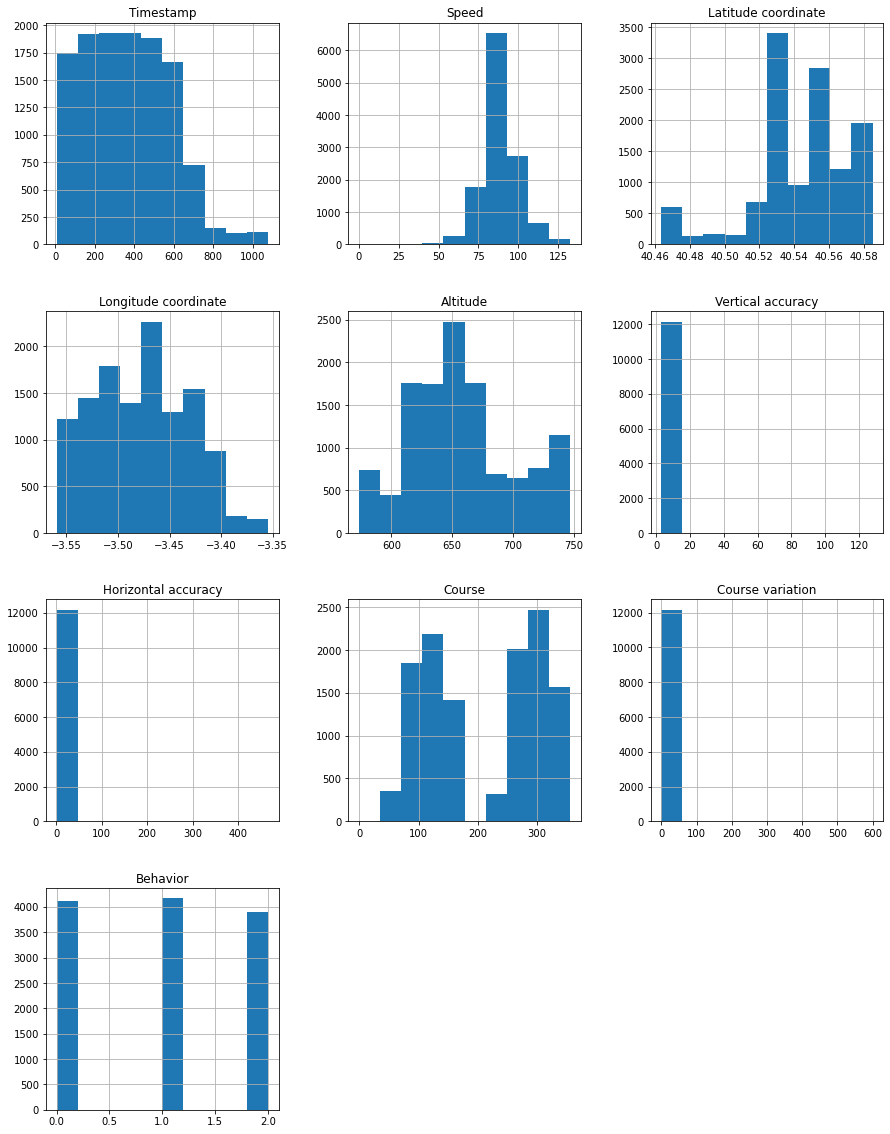

In [77]:
#plt.hist(df_gps['Speed'])
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_gps.hist(ax=ax,bins=10)
plt.show()

Most of the speed is between 80-110 km/hr

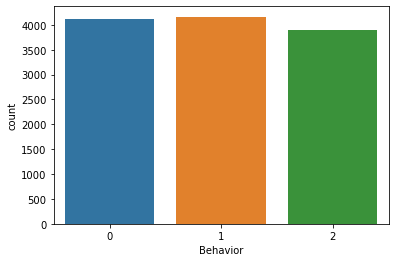

There are 4112 normal drivers tested, 4165 Aggressive, 3891 Drowsy 


In [78]:
sns.countplot(x='Behavior',data=df_gps)
plt.show()
Behavior = df_gps.Behavior.value_counts()
print(f"There are {Behavior[0]} normal drivers tested, {Behavior[1]} Aggressive, {Behavior[2]} Drowsy ")

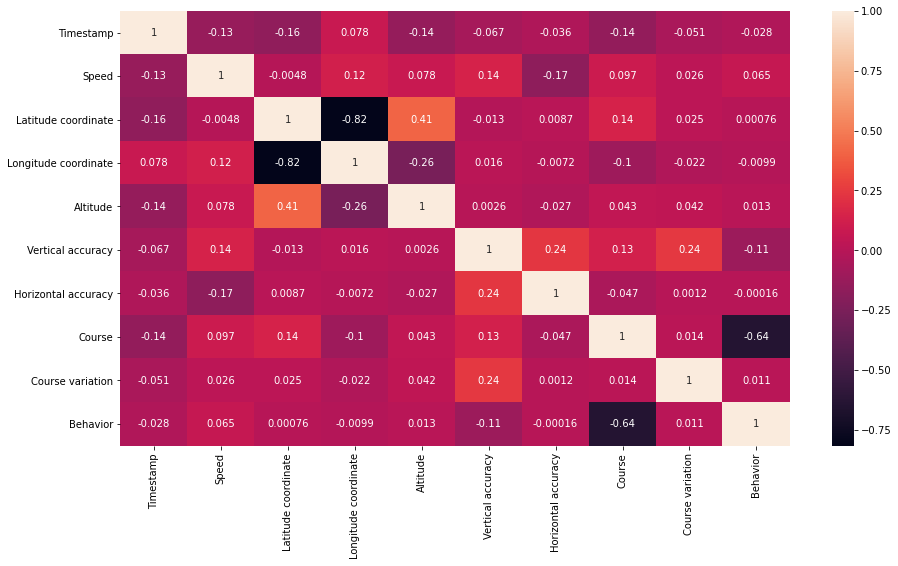

In [79]:
# Corelation Matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_gps.corr(),annot=True)
plt.show()

By this Correlation Matrix we get to know that there is no correlation among any components or variables of matrix 

# Model Prediction

In [80]:
# Assigning the data
X_new = df_gps.iloc[:,:-1]
y_new = df_gps.iloc[:,-1]

# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.5,random_state=42)

In [81]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled) 

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [82]:
# importing all the required models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

## Logistic Regression

In [83]:
# SEARCH FOR OPTIMUN PARAMETERS USING GRIDSEARCH
params = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100],'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [84]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [85]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [86]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 70.36%


<AxesSubplot:>

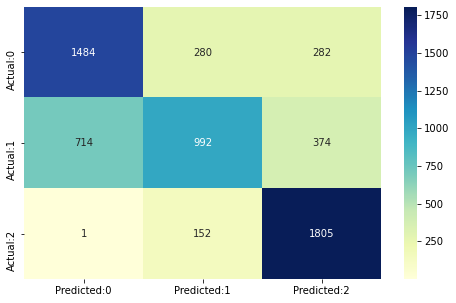

In [87]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [88]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      2046
           1       0.70      0.48      0.57      2080
           2       0.73      0.92      0.82      1958

    accuracy                           0.70      6084
   macro avg       0.70      0.71      0.69      6084
weighted avg       0.70      0.70      0.69      6084



In [89]:
logistic_f1 = f1_score(y_test, logistic_predict,average = 'weighted')
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 69.16%


## KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [92]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 1}

In [93]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [94]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")


Using k-nearest neighbours we get an accuracy of 91.44%


<AxesSubplot:>

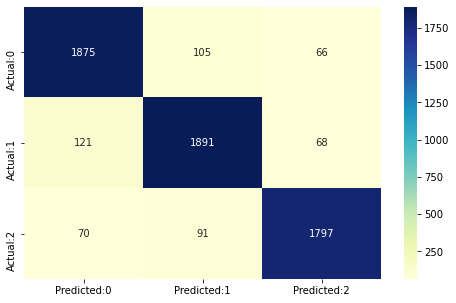

In [95]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [96]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2046
           1       0.91      0.91      0.91      2080
           2       0.93      0.92      0.92      1958

    accuracy                           0.91      6084
   macro avg       0.91      0.91      0.91      6084
weighted avg       0.91      0.91      0.91      6084



In [97]:
knn_f1 = f1_score(y_test, knn_predict,average='weighted')
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 91.44%


## Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [99]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [100]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [101]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [102]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 87.72%


<AxesSubplot:>

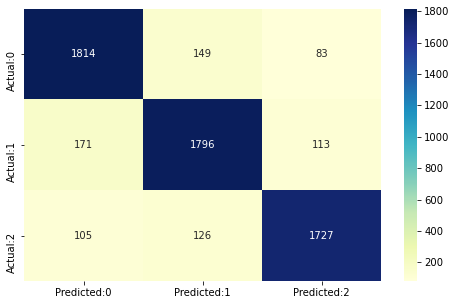

In [103]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [104]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2046
           1       0.87      0.86      0.87      2080
           2       0.90      0.88      0.89      1958

    accuracy                           0.88      6084
   macro avg       0.88      0.88      0.88      6084
weighted avg       0.88      0.88      0.88      6084



In [105]:
tree_f1 = f1_score(y_test, tree_predict,average = 'weighted')
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 87.72%


## Support Vector Machines

In [106]:
from sklearn.svm import SVC

In [107]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [108]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [115]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [110]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 90.91%


<AxesSubplot:>

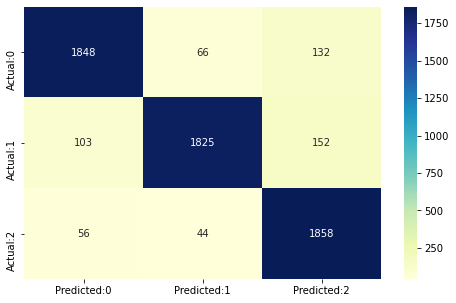

In [111]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [112]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2046
           1       0.94      0.88      0.91      2080
           2       0.87      0.95      0.91      1958

    accuracy                           0.91      6084
   macro avg       0.91      0.91      0.91      6084
weighted avg       0.91      0.91      0.91      6084



In [113]:
svm_f1 = f1_score(y_test, svm_predict,average = 'weighted')
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 90.92%


# Model Comparison

In [117]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy,'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'F1 score':svm_f1}
}).T

In [118]:
comparison

,Accuracy,F1 score
Logistic regression,0.703649,0.691613
K-nearest neighbours,0.914366,0.914395
Decision trees,0.877219,0.877247
Support vector machine,0.909106,0.909156


In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy','F1 score','AUC']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

## Analysis of Accelerometer

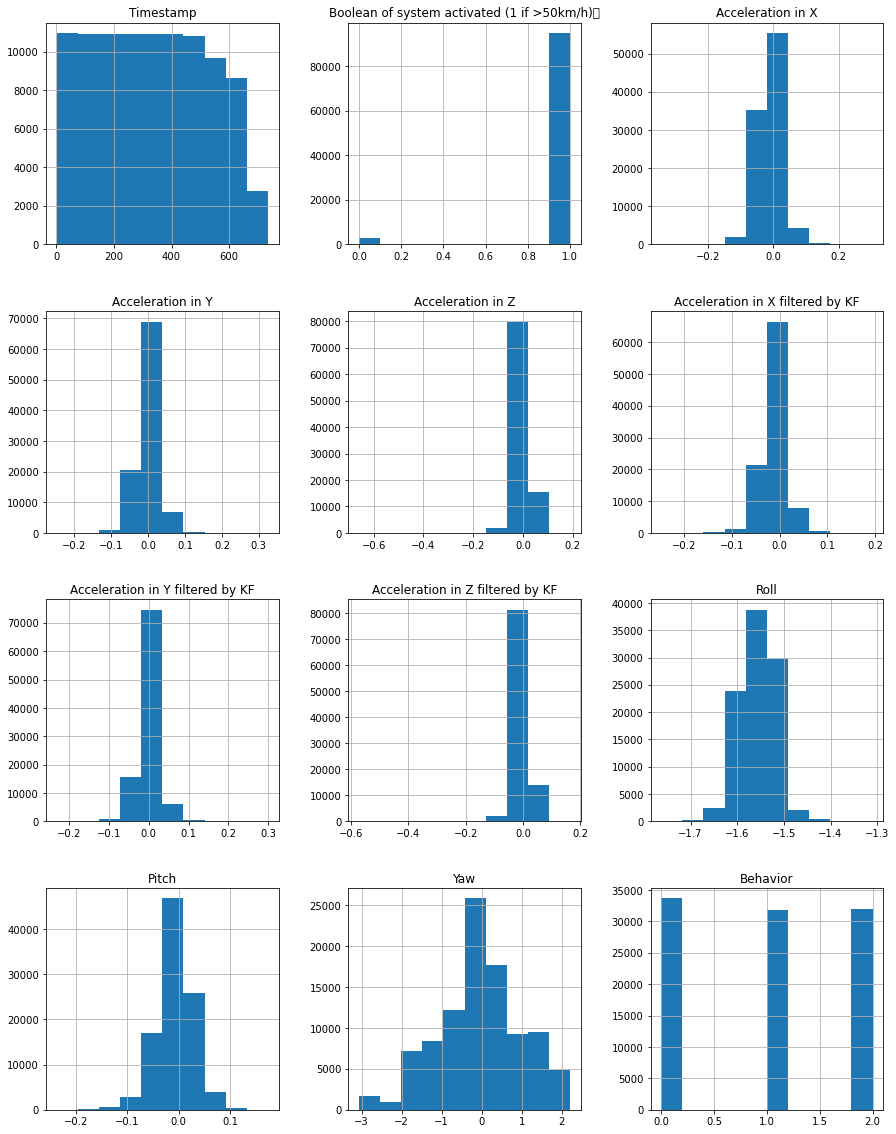

In [128]:
# Histogram Analyses
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_acc.hist(ax=ax,bins=10)
plt.show()

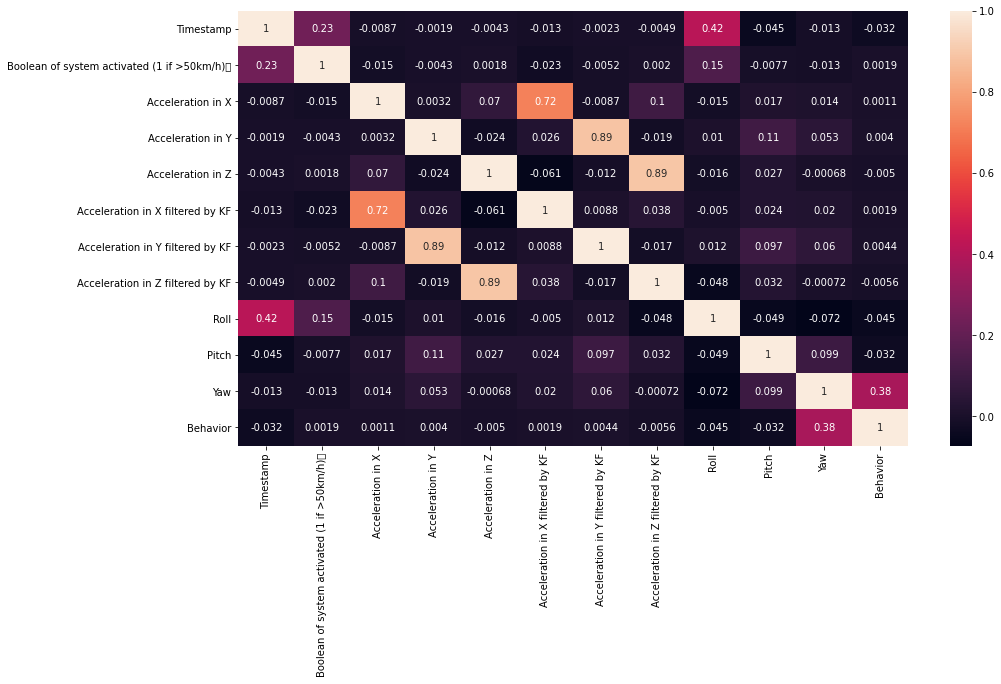

In [129]:
# Corelation Matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_acc.corr(),annot=True)
plt.show()

Acceration in X,Y,Z are highly correlated among each other

# Model Prediction

In [130]:
# Assigning the data
X_new = df_acc.iloc[:,:-1]
y_new = df_acc.iloc[:,-1]

# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.5,random_state=42)

In [131]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled) 

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [132]:
# importing all the required models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report

## Logistic Regression

In [133]:
# SEARCH FOR OPTIMUN PARAMETERS USING GRIDSEARCH
params = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100],'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [134]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

In [135]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [136]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 48.45%


<AxesSubplot:>

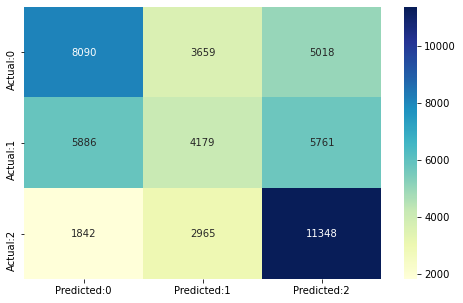

In [137]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [138]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.51      0.48      0.50     16767
           1       0.39      0.26      0.31     15826
           2       0.51      0.70      0.59     16155

    accuracy                           0.48     48748
   macro avg       0.47      0.48      0.47     48748
weighted avg       0.47      0.48      0.47     48748



In [139]:
logistic_f1 = f1_score(y_test, logistic_predict,average = 'weighted')
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 46.92%


## KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [142]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 9}

In [143]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [144]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 66.85%


<AxesSubplot:>

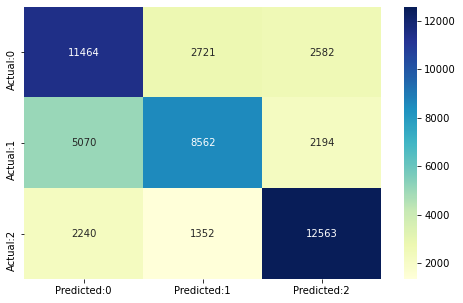

In [145]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [146]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.61      0.68      0.65     16767
           1       0.68      0.54      0.60     15826
           2       0.72      0.78      0.75     16155

    accuracy                           0.67     48748
   macro avg       0.67      0.67      0.67     48748
weighted avg       0.67      0.67      0.67     48748



In [147]:
knn_f1 = f1_score(y_test, knn_predict,average='weighted')
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 66.58%


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [148]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)


In [149]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 11}

In [151]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [152]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 80.1%


<AxesSubplot:>

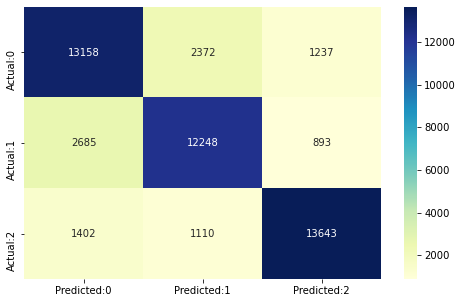

In [153]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [154]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     16767
           1       0.78      0.77      0.78     15826
           2       0.86      0.84      0.85     16155

    accuracy                           0.80     48748
   macro avg       0.80      0.80      0.80     48748
weighted avg       0.80      0.80      0.80     48748



In [155]:
tree_f1 = f1_score(y_test, tree_predict,average = 'weighted')
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 80.14%


## Support Vector Machines

In [156]:
from sklearn.svm import SVC

In [157]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [ ]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

In [ ]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [ ]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

In [ ]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,svm_predict))

In [ ]:
svm_f1 = f1_score(y_test, svm_predict,average = 'weighted')
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

# Model Comparison

In [ ]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy,'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'F1 score':svm_f1}
}).T

In [ ]:
comparison

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy','F1 score','AUC']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()